# AM783 Applied Markov Processes | From ODEs to SDEs

Hugo Touchette

Last updated: 10 October 2020

Python 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Solving ODEs in Python

Let us solve Newton's equations for the pendulum:
$$
m\ddot\theta +\frac{mg}{\ell}\sin\theta = 0.
$$
As seen in class, we can transform this 2nd-order ODE into a system of two coupled 1st-order ODEs:
\begin{eqnarray*}
\dot\theta &=& \varphi \\
\dot\varphi &=&\ddot \theta = -\omega^2\sin\theta,
\end{eqnarray*}
where
$$
\omega = \sqrt{\frac{g}{\ell}}
$$
is the natural frequency of the pendulum.

The first task, for simulating this system in Python, is to define as a Python function the force appearing on the right-hand side of the coupled ODEs. We have two such forces, so the function will return a vector (array):

In [3]:
def f(x, t):
    # x is our vector; we choose x[0]=theta and x[1]=phi
    g = 9.8  # Gravitational constant
    l = 1.0  # Pendulum length
    w = np.sqrt(g/l)

    dx0dt = x[1]
    dx1dt = -w**2 * np.sin(x[0])

    return([dx0dt, dx1dt])

Calling odeint, we can then do the simulation:

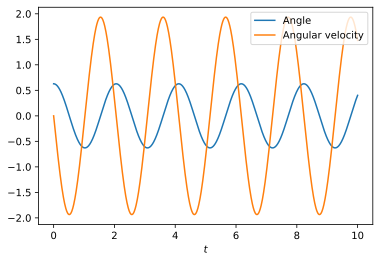

In [5]:
tfinal = 10.0
dt = 0.01
n = int(tfinal/dt)
tspan = np.linspace(0, tfinal, n)

x0 = [np.pi/5, 0] # Initial angle of pi/5; initial 0 velocity

x = odeint(f, x0, tspan) # Solution

plt.plot(tspan, x[:,0], label='Angle')
plt.plot(tspan, x[:,1], label='Angular velocity')
plt.xlabel(r'$t$')
plt.legend(loc='upper right')
plt.show()

## Solving SDEs with the Euler-Maruyama scheme

We solve now the linear ODE
$$
\dot x(t) = -\gamma x(t)
$$
by adding Gaussian white noise. This means that the SDE to solve is
$$
dX_t = -\gamma X_t dt+\sigma dW_t.
$$
Here $\gamma>0$ is the linear restitution constant, while $\sigma>0$ is the noise amplitude.

The Euler-Maruyama scheme for this SDE is direct:

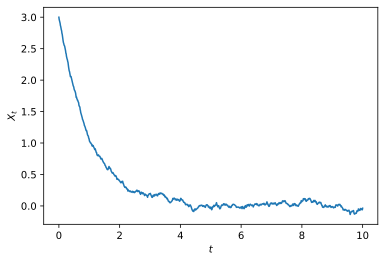

In [20]:
tfinal = 10.0
dt = 0.01
sqrtdt = np.sqrt(dt)
gamma = 1.0
sigma = 0.1

n = int(tfinal/dt)
x = np.zeros(n+1)

x[0] = 3.0  # Initial value

for i in range(n):
    x[i+1] = x[i] -gamma*x[i]*dt +sigma*sqrtdt*np.random.normal()

tspan = np.linspace(0, tfinal, n+1)
plt.plot(tspan, x)
plt.xlabel(r'$t$')
plt.ylabel(r'$X_t$')
plt.show()

Compare with the deterministic trajectory obtained with the Euler scheme (one could also use odeint):

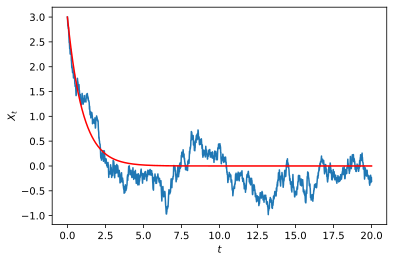

In [21]:
tfinal = 20.0
dt = 0.01
sqrtdt = np.sqrt(dt)
gamma = 1.0
sigma = 0.5

n = int(tfinal/dt)
x = np.zeros(n+1)
xdet = np.zeros(n+1)

x[0] = 3.0  # Initial value
xdet[0] = x[0]

for i in range(n):
    x[i+1] = x[i] -gamma*x[i]*dt + sigma*sqrtdt*np.random.normal()
    xdet[i+1] = xdet[i] -gamma*xdet[i]*dt

tspan = np.linspace(0, tfinal, n+1)
plt.plot(tspan, x)
plt.plot(tspan, xdet, 'r-')
plt.xlabel(r'$t$')
plt.ylabel(r'$X_t$')
plt.show()

Change the noise parameter $\sigma$ to see the effect of the noise.